# Network blending in StyleGAN

Swapping layers between two models in StyleGAN gives some interesting results. You need a base model and a second model which has been fine-tuned from the base.

In [ ]:
!git clone https://github.com/justinpinkney/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 269, done.
remote: Total 269 (delta 0), reused 0 (delta 0), pack-reused 269
Receiving objects: 100% (269/269), 2.31 MiB | 29.62 MiB/s, done.
Resolving deltas: 100% (143/143), done.


In [ ]:
%cd stylegan2

/content/stylegan2


In [ ]:
%tensorflow_version 1.x
!pip install typer

TensorFlow 1.x selected.


Command line help for the blending function is below. Make sure that you specify either `--output-grid` to save an example image or `--output-pkl` to save the modified pkl. (Currently only the the Gs network is modified)

- low_res_pkl: Path, # Pickle file from which to take low res layers
- high_res_pkl: Path, # Pickle file from which to take high res layers
- resolution: int, # Resolution level at which to switch between models
- level: int  = 0, # Switch at Conv block 0 or 1?
- blend_width: Optional[float] = None, # None = hard switch, float = smooth switch (logistic) with given width
- output_grid: Optional[Path] = "blended.jpg", # Path of image file to save example grid (None = don't save)
- seed: int = 0, # seed for random grid
- output_pkl: Optional[Path] = None, # Output path of pickle (None = don't save)
- verbose: bool = False, # Print out the exact blending fraction

         

In [ ]:
!python blend_models.py --help

Usage: blend_models.py [OPTIONS] LOW_RES_PKL
                       HIGH_RES_PKL RESOLUTION

Arguments:
  LOW_RES_PKL   [required]
  HIGH_RES_PKL  [required]
  RESOLUTION    [required]

Options:
  --level INTEGER                 [default: 0]
  --blend-width FLOAT
  --output-grid PATH              [default:
                                  blended.jpg]

  --seed INTEGER                  [default: 0]
  --output-pkl PATH
  --verbose / --no-verbose        [default: False]
  --install-completion [bash|zsh|fish|powershell|pwsh]
                                  Install
                                  completion for
                                  the specified
                                  shell.

  --show-completion [bash|zsh|fish|powershell|pwsh]
                                  Show completion
                                  for the
                                  specified shell,
                                  to copy it or
                                  customize the

Use as an example a model I fine-tuned at 256 from FFHQ to data scraped from NASA DSCOVR:EPIC satellite (https://epic.gsfc.nasa.gov/).

For the output of the fine-tuned model see the tweet below (https://twitter.com/Buntworthy/status/1295445259971899393)

I'm actually going to use a model from earlier in training than the result shown in the tweet, this makes the blending a bit nicer.

In [ ]:
%pwd

'/content/stylegan2'

In [ ]:
# pre-trained cat
!gdown https://drive.google.com/uc?id=1OTBhZWzJOWODG_iGgKiYv1h170WB4S5O
# cartoon cat - 15016
!gdown https://drive.google.com/uc?id=1-iguLS1btcAmnJG4-GPJcqb3G-SLvq_k
# cartoon cat - 15080
!gdown https://drive.google.com/uc?id=1-qJZFDHd2ppxxuDs_6nbqH692d1M0Aqj

Downloading...
From: https://drive.google.com/uc?id=1OTBhZWzJOWODG_iGgKiYv1h170WB4S5O
To: /content/stylegan2/stylegan2-cat-config-f.pkl
357MB [00:01, 250MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-iguLS1btcAmnJG4-GPJcqb3G-SLvq_k
To: /content/stylegan2/network-snapshot-015016.pkl
357MB [00:01, 240MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-qJZFDHd2ppxxuDs_6nbqH692d1M0Aqj
To: /content/stylegan2/network-snapshot-015080.pkl
357MB [00:01, 269MB/s]


In [ ]:
from IPython.display import Image 

Time to try out a bunch of different resolutions for the switch and display the results. Remember the earth model provides the low-resolution layers, i.e. the "structure", and the original faces model the high-resolution, i.e. the "texture"

I'm going to run the main function in blend_models.py in a python loop, but you can also run it from the command line, something like

`python blend_models.py epic-slim-256-000040.pkl stylegan2-ffhq.pkl 64 --output-grid "blended.jpg"`

blending at 8x8


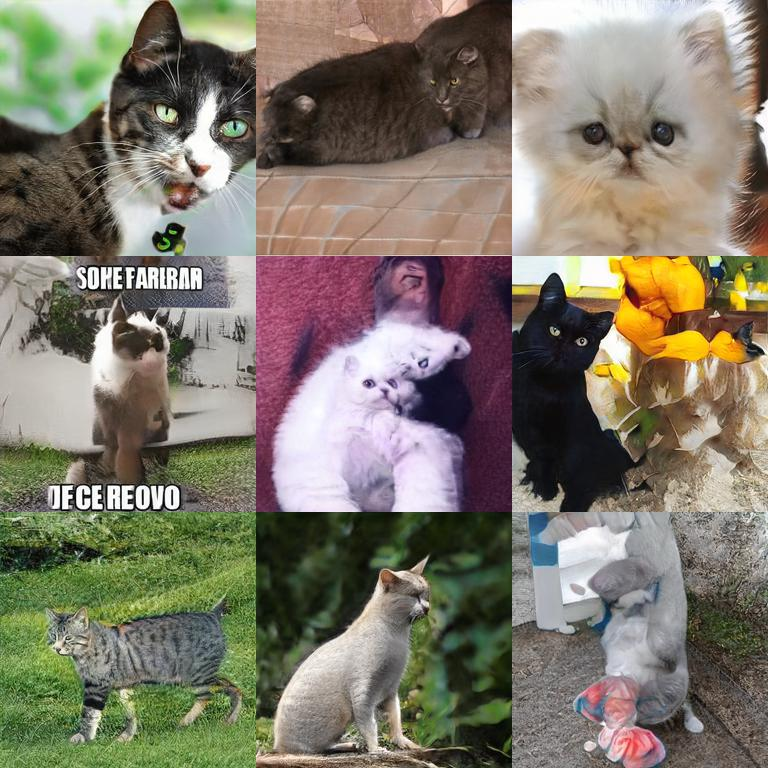

blending at 16x16


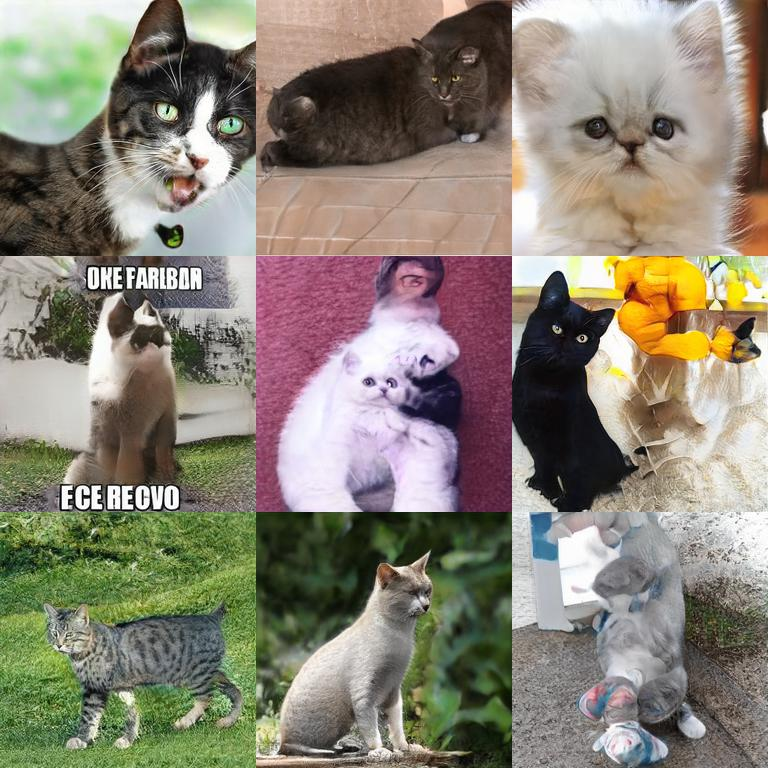

blending at 32x32


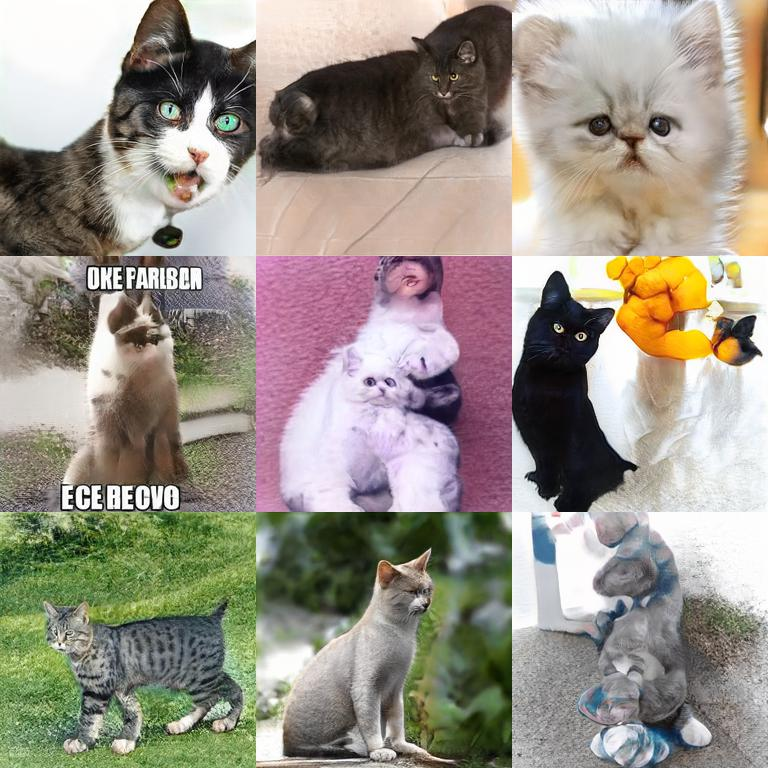

blending at 64x64


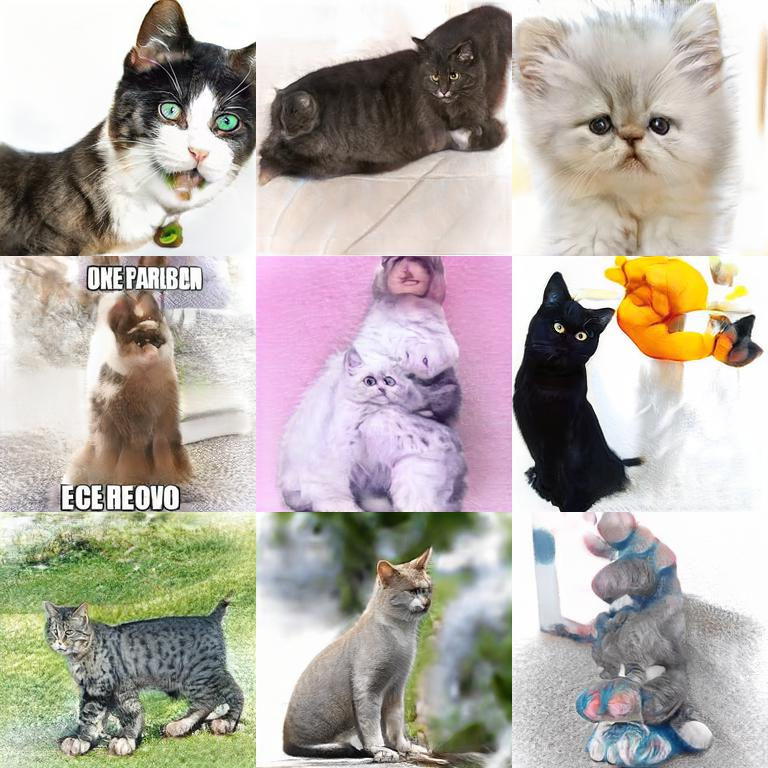

KeyboardInterrupt: ignored

In [ ]:
import blend_models

resolutions = (8, 16, 32, 64, 128)
for res in resolutions:
  filename = f"blended-{res}.jpg"
  blend_models.main("stylegan2-cat-config-f.pkl", "network-snapshot-015016.pkl", res, output_grid=filename)
  img = Image(filename=filename)
  print(f"blending at {res}x{res}")
  display(img)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
blending at 8x8


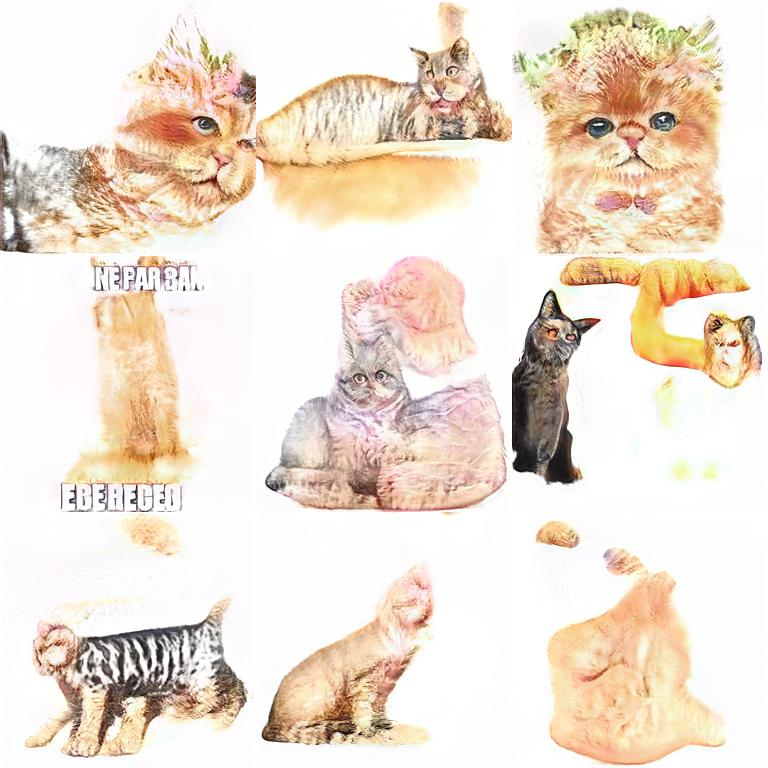

blending at 16x16


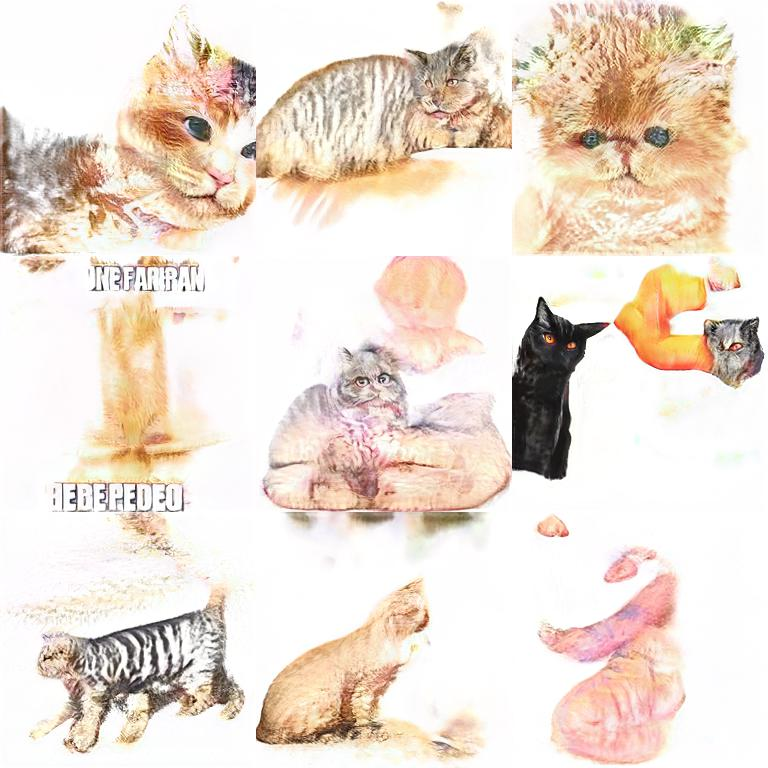

blending at 32x32


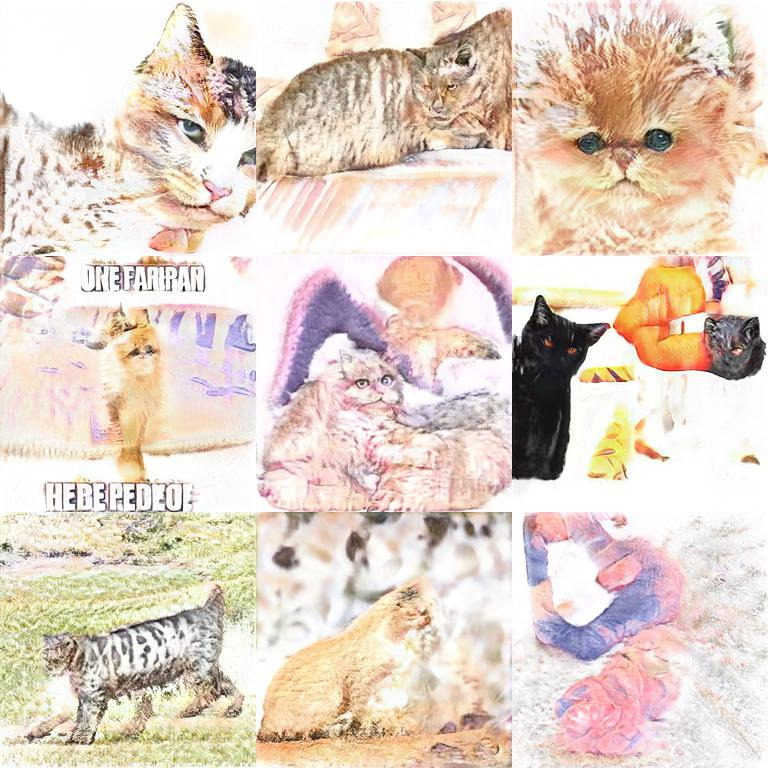

blending at 64x64


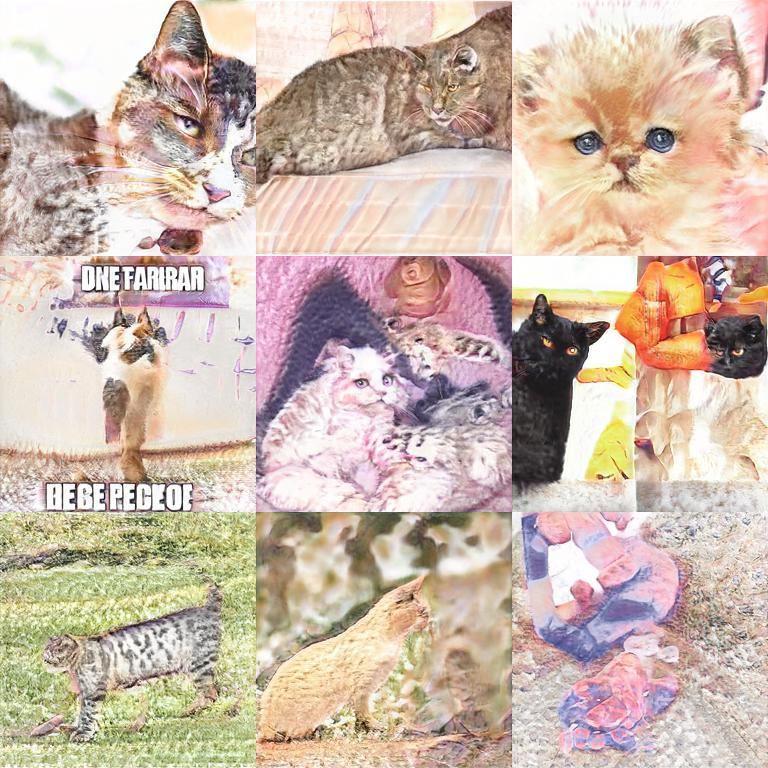

blending at 128x128


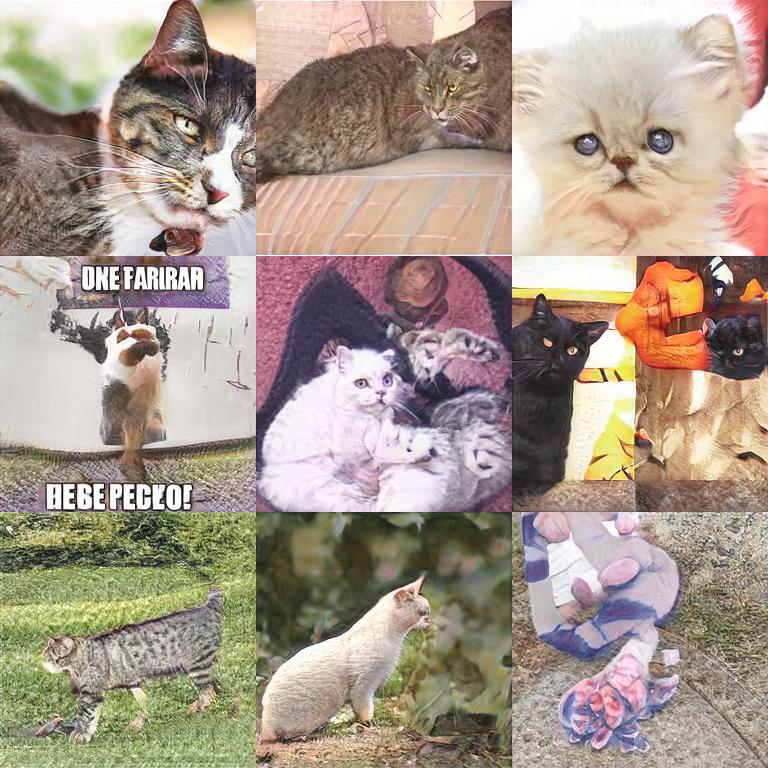

In [ ]:
import blend_models

resolutions = (8, 16, 32, 64, 128)
for res in resolutions:
  filename = f"blended-{res}.jpg"
  blend_models.main("network-snapshot-015080.pkl", "stylegan2-cat-config-f.pkl", res, output_grid=filename)
  img = Image(filename=filename)
  print(f"blending at {res}x{res}")
  display(img)

In [ ]:
!python blend_models epic-slim-256-000040.pkl stylegan2-ffhq.pkl 32 --output-pkl="blended.pkl"